In [2]:
import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

from tqdm.notebook import tqdm_notebook as tqdm

import os


In [3]:


bhartiya = r"C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya"
russian = r"C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian"
italian = r"C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian"
chinese = r"C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese"

# Get image file paths
b_path = os.listdir(bhartiya)
r_path = os.listdir(russian)
i_path = os.listdir(italian)
c_path = os.listdir(chinese)


In [4]:
def load_img(path):
    image = cv2.imread(path)
    if image is None:
        print(f"Error: Image not loaded from {path}")
        return None
    else:
        image = cv2.resize(image, (224, 224))
        height, width = image.shape[:2]
        print(f"Loaded image from {path}. Dimensions: {width} x {height}")
        return image

Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya\download (1).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya\download (10).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya\download (11).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya\download (2).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya\download (3).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\bhartiya\download (4).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detect

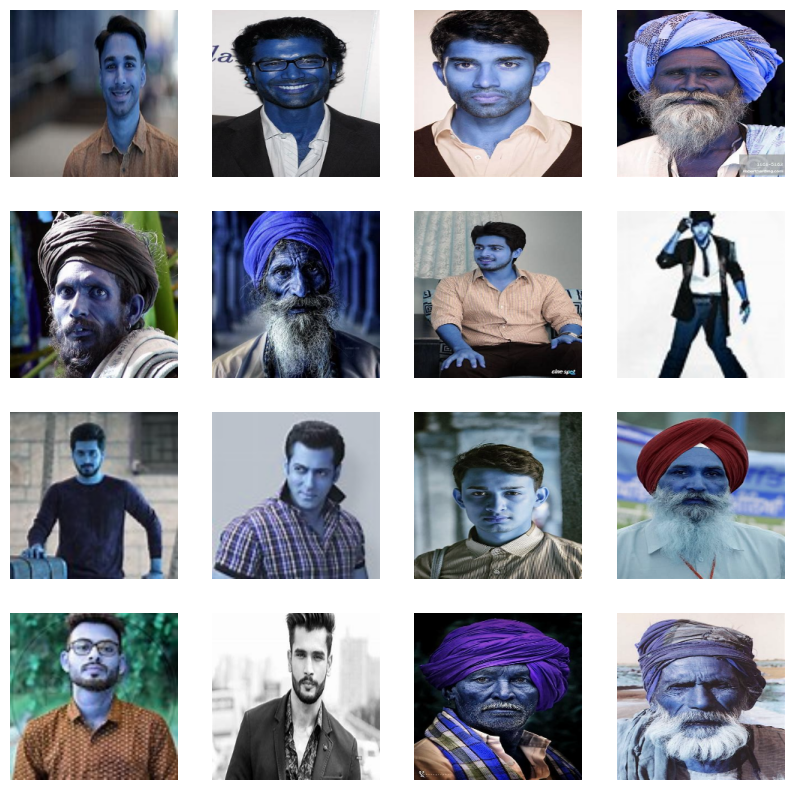

In [5]:
try:
    fig = plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        img = load_img(os.path.join(bhartiya, b_path[i]))
        if img is not None:
            plt.imshow(img, cmap='gray')
            plt.axis('off')
    plt.show()
except Exception as e:
    print("Error during detection:", str(e))



Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (10) (1).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (14).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (15).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (16).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (17).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (18).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\russian\OIP (19).jp

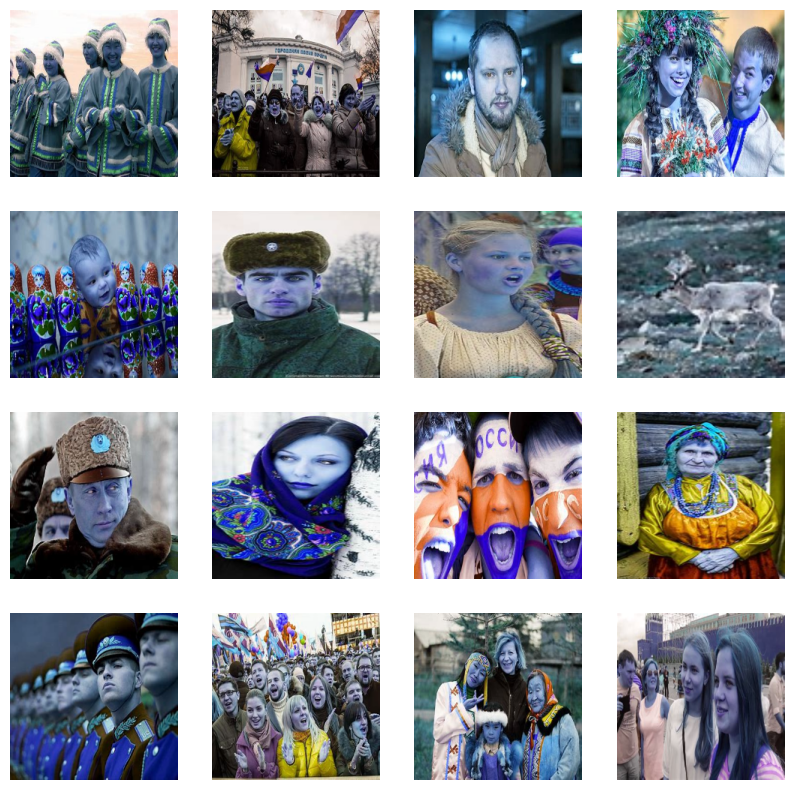

In [6]:
try:
    fig = plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        img = load_img(os.path.join(russian, r_path[i]))
        if img is not None:
            plt.imshow(img, cmap='gray')
            plt.axis('off')
    plt.show()
except Exception as e:
    print("Error during detection:", str(e))


Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian\download (1).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian\download (10).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian\download (11).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian\download (3).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian\download (4).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itlian\download (5).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\itl

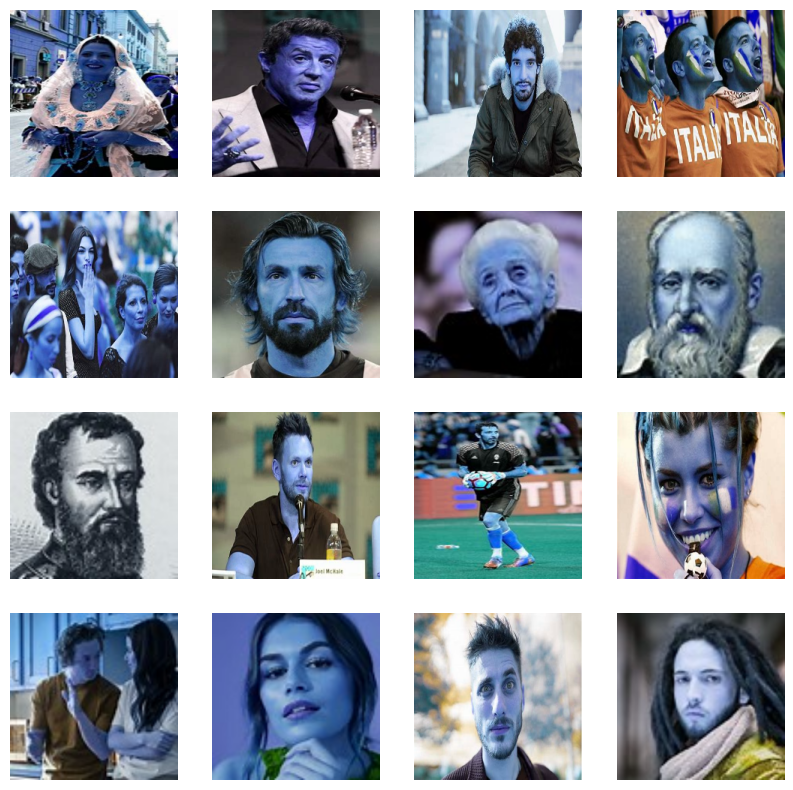

In [7]:
try:
    fig = plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        img = load_img(os.path.join(italian, i_path[i]))
        if img is not None:
            plt.imshow(img, cmap='gray')
            plt.axis('off')
    plt.show()
except Exception as e:
    print("Error during detection:", str(e))


Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (1) (1).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (10).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (13).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (14).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (15).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (16).jpeg. Dimensions: 224 x 224
Loaded image from C:\Users\mudug\Downloads\Nationality_Detection-main (1)\Nationality_Detection-main\chinese\OIP (17).jpe

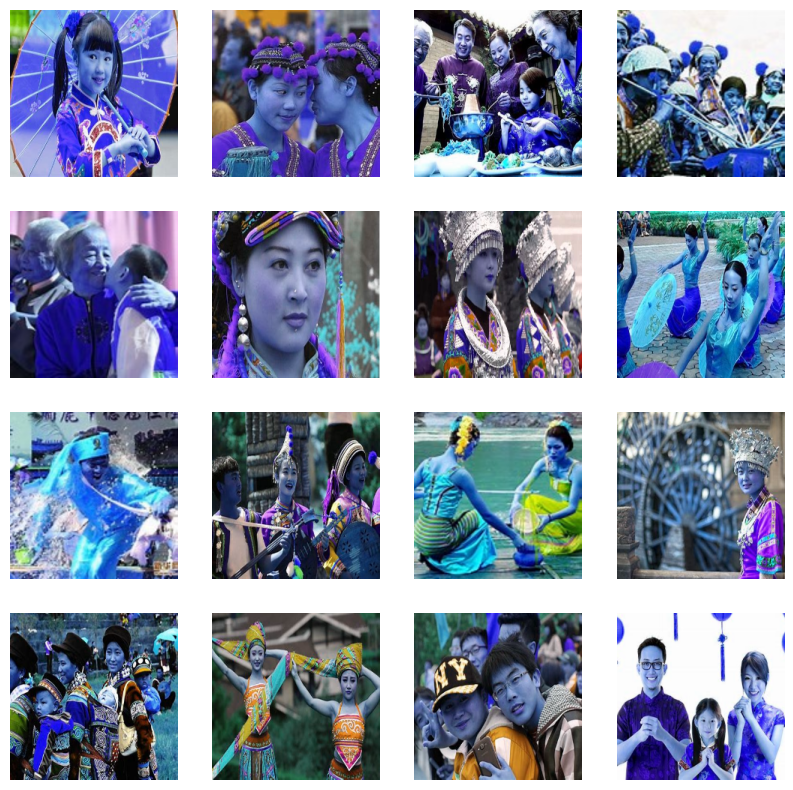

In [8]:
try:
    fig = plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        img = load_img(os.path.join(chinese, c_path[i]))
        if img is not None:
            plt.imshow(img, cmap='gray')
            plt.axis('off')
    plt.show()
except Exception as e:
    print("Error during detection:", str(e))


In [11]:
dataset_path = r"C:\Users\mudug\OneDrive\Desktop\nullclass\nationality detecation"
classes = ['bhartiya', 'russian', 'italian', 'chinese']

In [12]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.3)

In [13]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          classes=classes,
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          classes=classes,
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 121 images belonging to 4 classes.
Found 49 images belonging to 4 classes.


In [14]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(96,96,3))
vgg16_model.output[-1]

<KerasTensor shape=(3, 3, 512), dtype=float32, sparse=False, name=keras_tensor_19>

In [15]:
from tensorflow.keras.models import Model

for layer in vgg16_model.layers:
    layer.trainable = False

# Define the rest of the model
flatten_layer = Flatten()(vgg16_model.output)
output_layer = Dense(4, activation="sigmoid")(flatten_layer)

# Combine the VGG16 base model with custom output layers
model = Model(inputs=vgg16_model.input, outputs=output_layer)

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Display model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │        18,436 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,124 (56.20 MB)

 Trainable params: 18,436 (72.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001
checkpoint = ModelCheckpoint("model.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
lr_callbacks = [checkpoint]

In [17]:
hist =  model.fit(train,
                    epochs=25,
                    callbacks=lr_callbacks,
                    validation_data=val)

Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.5133 - loss: 1.2884
Epoch 1: saving model to model.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5148 - loss: 1.2822 - val_accuracy: 0.5306 - val_loss: 1.2160
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.5478 - loss: 1.1502
Epoch 2: saving model to model.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5490 - loss: 1.1453 - val_accuracy: 0.5510 - val_loss: 1.1467
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.5657 - loss: 1.0636
Epoch 3: saving model to model.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5649 - loss: 1.0600 - val_accuracy: 0.5918 - val_loss: 1.0568
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.5584 - loss: 0.9812
Epoch 4: saving model to model.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5575 - loss: 0.9805 - val_accuracy: 0.5714 - val_loss: 1.0026
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accurac

In [21]:
epochs = 25
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.style.use(['classic'])

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

Error in callback <function _draw_all_if_interactive at 0x000002EE6605A200> (for post_execute), with arguments args (),kwargs {}:


AttributeError: module 'numpy' has no attribute 'iterable'

AttributeError: module 'numpy' has no attribute 'iterable'

<Figure size 560x400 with 1 Axes>

AttributeError: module 'numpy' has no attribute 'iterable'

<Figure size 560x400 with 1 Axes>

In [20]:
model_json = model.to_json()
with open("model_n.json","w") as json_file:
    json_file.write(model_json)